In [4]:
import pandas as pd 
import os 


In [5]:
df = pd.read_excel('sleep data/August.xls')
df.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2020-08-31 2:35AM,2020-08-31 9:14AM,362,37,22,399,105.0,158.0,99.0
1,2020-08-28 7:44PM,2020-08-28 9:12PM,85,3,0,88,NaN,NaN,NaN
2,2020-08-28 1:14AM,2020-08-28 9:16AM,398,84,26,482,70.0,237.0,91.0
3,2020-08-27 5:52AM,2020-08-27 9:29AM,196,21,12,217,44.0,131.0,21.0
4,2020-08-27 1:24AM,2020-08-27 4:29AM,164,21,16,185,41.0,83.0,40.0


concatenate all data 

In [6]:
files = [file for file in os.listdir("D:\work and education\programming\python project/sleep data")] 
all_sleep_data =pd.DataFrame()
for file in files :
 df = pd.read_excel("D:\work and education\programming\python project/sleep data/"+file)
all_sleep_data = pd.concat([all_sleep_data,df])
all_sleep_data.to_csv("all_sleep_ data.xls", index= False)

all_sleep_data.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2020-09-30 7:31AM,2020-09-30 10:24AM,157,16,1,173,NaN,NaN,NaN
1,2020-09-30 12:02AM,2020-09-30 3:13AM,165,26,13,191,40.0,103.0,22.0
2,2020-09-29 12:36AM,2020-09-29 7:32AM,343,73,28,416,78.0,204.0,61.0
3,2020-09-27 12:03AM,2020-09-27 4:13AM,220,30,18,250,43.0,130.0,47.0
4,2020-09-26 5:02AM,2020-09-26 9:31AM,238,30,19,268,65.0,139.0,34.0


drop all nan value 


In [7]:

nan_df = all_sleep_data[all_sleep_data.isna().any(axis=1)]
all_sleep_data = all_sleep_data.dropna(how="all")



In [8]:
all_sleep_data['deep sleep'] =  (all_sleep_data['Minutes REM Sleep' ]/60)
all_sleep_data.head()


,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,deep sleep
0,2020-09-30 7:31AM,2020-09-30 10:24AM,157,16,1,173,NaN,NaN,NaN,NaN
1,2020-09-30 12:02AM,2020-09-30 3:13AM,165,26,13,191,40.0,103.0,22.0,0.666667
2,2020-09-29 12:36AM,2020-09-29 7:32AM,343,73,28,416,78.0,204.0,61.0,1.300000
3,2020-09-27 12:03AM,2020-09-27 4:13AM,220,30,18,250,43.0,130.0,47.0,0.716667
4,2020-09-26 5:02AM,2020-09-26 9:31AM,238,30,19,268,65.0,139.0,34.0,1.083333


In [9]:
all_sleep_data['Start Time'] = pd.to_datetime(all_sleep_data['Start Time'])
all_sleep_data['hour'] = all_sleep_data['Start Time'].dt.time
all_sleep_data['hour']
all_sleep_data.head()






,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,deep sleep,hour
0,2020-09-30 07:31:00,2020-09-30 10:24AM,157,16,1,173,NaN,NaN,NaN,NaN,07:31:00
1,2020-09-30 00:02:00,2020-09-30 3:13AM,165,26,13,191,40.0,103.0,22.0,0.666667,00:02:00
2,2020-09-29 00:36:00,2020-09-29 7:32AM,343,73,28,416,78.0,204.0,61.0,1.300000,00:36:00
3,2020-09-27 00:03:00,2020-09-27 4:13AM,220,30,18,250,43.0,130.0,47.0,0.716667,00:03:00
4,2020-09-26 05:02:00,2020-09-26 9:31AM,238,30,19,268,65.0,139.0,34.0,1.083333,05:02:00


Text(0, 0.5, 'num of hours')

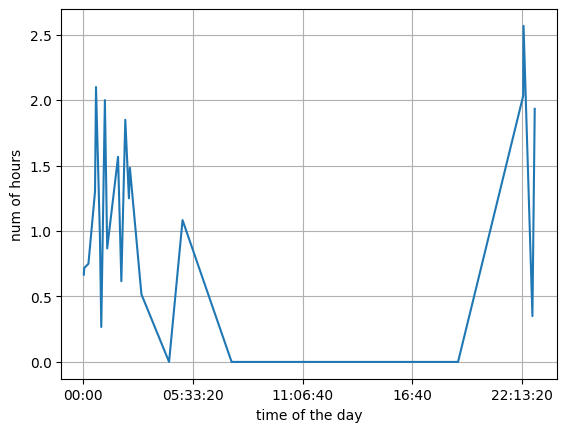

In [12]:
import matplotlib.pyplot as plt

result = all_sleep_data.groupby('hour') ['deep sleep'].sum()
result.plot()
plt.grid()

plt.xlabel("time of the day")
plt.ylabel('num of hours')
